# SIIM: Step-by-Step Image Detection for Beginners 
## Part 2. Basic Modeling (The Easiest Model using Keras)

👉 Part 1. [EDA to Preprocessing](https://www.kaggle.com/songseungwon/siim-covid-19-detection-10-step-tutorial-1)

### Thanks for nice reference :

`load dataset(original image size info-)`
- [Resized to 256px JPG](https://www.kaggle.com/xhlulu/siim-covid19-resized-to-256px-jpg)

> Index
```
Step 1. Load Data and Trim for use
     1-a. load train-dataframe
     1-b. load meta-dataframe
     1-c. load image data array
     1-d. calculate image resize ratio information
Step 2. Image Pre-Classification with Data generator
     2-a. classify image id by opacity types
     2-b. sort image files into each type's folder
     2-c. data generation, split train/valid set
Step 3. Modeling I - Basic Multiclass classifier
     3-a. import libraries
     3-b. basic modeling with keras api
     3-c. model compile
     3-d. save model checkpoint
     3-e. model fit
     3-f. model evaluate & save
     3-g. reload model & model summary
Step 4. Modeling II - Multiclass classifier using EfficientNet(Transfer Learning)
     4-a. Load the EfficientNet and try it out
     4-b.  Improving performance with an appropriate form
```

## Step 1. Load Data and Trim for use

### 1-a. load train-dataframe

In [4]:
import pandas as pd

In [5]:
# train_df = pd.read_csv('/kaggle/input/siimcovid19-train-data-that-opacitycount-added/train_df.csv')
# local
train_df = pd.read_csv('/kaggle/input/siimcovid19-train-data-that-opacitycount-added/train_df.csv')

In [6]:
train_df.head()

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Path
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/57...
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,/kaggle/input/siim-covid19-detection//train/ff...
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/9d...
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,/kaggle/input/siim-covid19-detection//train/28...
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/df...


We don't use dcm file. drop 'path' column

In [7]:
train_df.drop(columns='Path', axis=1,inplace=True)

In [8]:
train_df.head()

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0


And add 'Opacity' Column. The Value is 1 If Opacity detected, else 0

In [9]:
train_df['Opacity'] = train_df.apply(lambda row : 1 if row.label.split(' ')[0]=='opacity' else 0, axis=1)
train_df

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6329,6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0
6330,6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0
6331,6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1
6332,6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1


In [10]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)
train_df

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0
6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0
6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1
6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1


### 1-b. load meta-dataframe

We need the size of the individual images. This is necessary later to calculate the ratio and find the coordinates of the box border to detect the opacity.

In [11]:
meta_df = pd.read_csv('/kaggle/input/siim-covid19-resized-to-256px-jpg/meta.csv')

In [12]:
meta_df.head()

,image_id,dim0,dim1,split
0,a29c5a68b07b,2320,2828,test
1,9850b5470fd6,2330,2382,test
2,8d6dea06a032,2422,3344,test
3,dfc5c09a50bc,1140,1387,test
4,7230234e120a,2318,2383,test


- Y(height) : `dim0` 
- X(width) : `dim1`


In [13]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  7597 non-null   object
 1   dim0      7597 non-null   int64 
 2   dim1      7597 non-null   int64 
 3   split     7597 non-null   object
dtypes: int64(2), object(2)
memory usage: 237.5+ KB


In [14]:
meta_df.split.unique()

array(['test', 'train'], dtype=object)

In [15]:
import warnings
warnings.filterwarnings(action='ignore')

In [16]:
train_meta_df = meta_df.loc[meta_df.split=='train']
train_meta_df.drop('split',axis=1,inplace=True)
train_meta_df.columns = ['id', 'origin_img_height','origin_img_width']
train_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 1263 to 7596
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 6334 non-null   object
 1   origin_img_height  6334 non-null   int64 
 2   origin_img_width   6334 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 197.9+ KB


In [17]:
train_meta_df

,id,origin_img_height,origin_img_width
1263,d8ba599611e5,2336,2836
1264,29b23a11d1e4,3488,4256
1265,8174f49500a5,2330,2846
1266,d54f6204b044,2330,2846
1267,d51cadde8626,3488,4256
...,...,...,...
7592,729eca7b4c1c,2539,3050
7593,39d52f244db3,2320,2832
7594,d342f75ccb55,2320,2832
7595,0f0b5a304a47,2320,2832


In [18]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1


In [19]:
# test lambda
train_df['id'].apply(lambda x : x.split('_')[0])


0       000a312787f2
1       000c3a3f293f
2       0012ff7358bc
3       001398f4ff4f
4       001bd15d1891
            ...     
6329    ffcc6edd9445
6330    ffd91a2c4ca0
6331    ffd9b6cf2961
6332    ffdc682f7680
6333    ffe942c8655f
Name: id, Length: 6334, dtype: object

In [20]:
train_df['id'] = train_df['id'].apply(lambda x : x.split('_')[0])

In [21]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1


In [22]:
train_df = pd.merge(train_df, train_meta_df, on='id')

In [23]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity,origin_img_height,origin_img_width
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1,3488,4256
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0,2320,2832
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1,2544,3056
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1,3520,4280
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1,2800,3408


### 1-c. load image data array

In [24]:
path = '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/'
train_imgs_path = list(train_df['id'].apply(lambda x : path + x + '.jpg').values)
train_imgs_path[:10]

['/kaggle/input/siim-covid19-resized-to-256px-jpg/train/000a312787f2.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/000c3a3f293f.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/0012ff7358bc.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/001398f4ff4f.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/001bd15d1891.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/0022227f5adf.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/0023f02ae886.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/002e9b2128d0.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/00326161e51e.jpg',
 '/kaggle/input/siim-covid19-resized-to-256px-jpg/train/0044e449aae1.jpg']

Test sample image

In [25]:
import matplotlib.pyplot as plt

In [26]:
img = plt.imread(train_imgs_path[0])

In [27]:
img.shape

(256, 256)

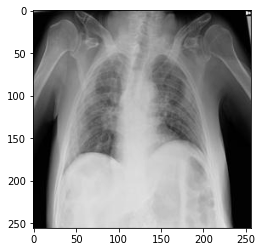

In [28]:
plt.imshow(img, cmap='gray');

In [29]:
import numpy as np

In [30]:
i = 0
train_imgs = []
for img_path in train_imgs_path:
    img = plt.imread(img_path)
    train_imgs.append(img)
    i += 1
    if i % 1000 == 0:
        print('{} / {}'.format(i, len(train_imgs_path)))
    elif i == 6334:
        print('6334 / 6334 (End)')

1000 / 6334
2000 / 6334
3000 / 6334
4000 / 6334
5000 / 6334
6000 / 6334
6334 / 6334 (End)


In [31]:
type(train_imgs)

list

In [32]:
train_imgs = np.array(train_imgs)

In [33]:
train_imgs.shape

(6334, 256, 256)

add Channel (3dim to 4dim, gray)

In [34]:
train_imgs_path[0]

'/kaggle/input/siim-covid19-resized-to-256px-jpg/train/000a312787f2.jpg'

In [35]:
train_imgs[:,:,:,np.newaxis].shape

(6334, 256, 256, 1)

In [36]:
train_imgs_4dim = train_imgs[:,:,:,np.newaxis]
train_imgs_4dim.shape

(6334, 256, 256, 1)

And simply EDA

In [37]:
len(train_imgs)

6334

In [38]:
min(train_imgs[0].reshape(-1)), max(train_imgs[0].reshape(-1))

(0, 255)

In [39]:
min(train_imgs[13].reshape(-1)), max(train_imgs[13].reshape(-1))

(0, 255)

### 1-d. calculate image resize ratio information

In [40]:
train_df['origin_img_height']

0       3488
1       2320
2       2544
3       3520
4       2800
        ... 
6329    4240
6330    2800
6331    2388
6332    3488
6333    1140
Name: origin_img_height, Length: 6334, dtype: int64

In [41]:
train_df['height_ratio'] = train_df['origin_img_height'].apply(lambda x : 255/x)
train_df['height_ratio']

0       0.073108
1       0.109914
2       0.100236
3       0.072443
4       0.091071
          ...   
6329    0.060142
6330    0.091071
6331    0.106784
6332    0.073108
6333    0.223684
Name: height_ratio, Length: 6334, dtype: float64

In [42]:
train_df['origin_img_width']

0       4256
1       2832
2       3056
3       4280
4       3408
        ... 
6329    3480
6330    3408
6331    3050
6332    4256
6333    1387
Name: origin_img_width, Length: 6334, dtype: int64

In [43]:
train_df['width_ratio'] = train_df['origin_img_width'].apply(lambda x : 255/x)
train_df['width_ratio']

0       0.059915
1       0.090042
2       0.083442
3       0.059579
4       0.074824
          ...   
6329    0.073276
6330    0.074824
6331    0.083607
6332    0.059915
6333    0.183850
Name: width_ratio, Length: 6334, dtype: float64

In [44]:
train_df

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity,origin_img_height,origin_img_width,height_ratio,width_ratio
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1,3488,4256,0.073108,0.059915
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0,2320,2832,0.109914,0.090042
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1,2544,3056,0.100236,0.083442
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1,3520,4280,0.072443,0.059579
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1,2800,3408,0.091071,0.074824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0,4240,3480,0.060142,0.073276
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0,2800,3408,0.091071,0.074824
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1,2388,3050,0.106784,0.083607
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1,3488,4256,0.073108,0.059915


## Step 2. Image Pre-Classification with Data generator

### 2-a. classify image id by Opacity types

In [45]:
types = list(train_df.columns[5:9])
types

['Negative for Pneumonia',
 'Typical Appearance',
 'Indeterminate Appearance',
 'Atypical Appearance']

In [46]:
path

'/kaggle/input/siim-covid19-resized-to-256px-jpg/train/'

In [47]:
train_imgs.shape

(6334, 256, 256)

### 2-b. sort image files into each type's folder

Create folders for each class **in advance**, and save images in each folder.

In [48]:
!mkdir ./genData
!mkdir ./genData/Negative
!mkdir ./genData/Typical
!mkdir ./genData/Indeterminate
!mkdir ./genData/Atypical

In [49]:
# Negative for Pneumonia
imgs_Negative = list(train_df[train_df[types[0]]==1].index)
for idx in imgs_Negative:
    plt.imsave('./genData/Negative/{}.jpg'.format(train_df.loc[idx,'id']), train_imgs[idx], cmap='gray')

In [50]:
# Typical Apperance
imgs_Typical = list(train_df[train_df[types[1]]==1].index)
for idx in imgs_Typical:
    plt.imsave('./genData/Typical/{}.jpg'.format(train_df.loc[idx,'id']), train_imgs[idx], cmap='gray')

In [51]:
# Indeterminate Apearance
imgs_Indeterminate = list(train_df[train_df[types[2]]==1].index)
for idx in imgs_Indeterminate:
    plt.imsave('./genData/Indeterminate/{}.jpg'.format(train_df.loc[idx,'id']), train_imgs[idx], cmap='gray')

In [52]:
# Atypical Apearance
imgs_Atypical = list(train_df[train_df[types[3]]==1].index)
for idx in imgs_Atypical:
    plt.imsave('./genData/Atypical/{}.jpg'.format(train_df.loc[idx,'id']), train_imgs[idx], cmap='gray')

### 2-c. data generation, split train/valid set

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
idg = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=3,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False,
    fill_mode='reflect',
    validation_split=0.2
)

In [55]:
data_path = './genData'
batch_size = 64
target_size = (256, 256)
class_mode = 'categorical'
color_mode = 'grayscale'

In [56]:
train_gen = idg.flow_from_directory(
    data_path,
    batch_size=batch_size,
    target_size=target_size,
    class_mode=class_mode,
    color_mode=color_mode,
    subset = 'training'
)

valid_gen = idg.flow_from_directory(
    data_path,
    batch_size = batch_size,
    target_size = target_size,
    class_mode = class_mode,
    color_mode=color_mode,
    subset = 'validation'
)

Found 5069 images belonging to 4 classes.
Found 1265 images belonging to 4 classes.


## Step 3. Modeling I - Basic Multiclass classifier

### 3-a. import libraries

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

### 3-b. basic modeling with keras api

In [58]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(256, 256,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

### 3-c. model compile

In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

### 3-d. save model checkpoint

In [60]:
filepath = 'my_checkpoint.ckpt'
cp = ModelCheckpoint(
    filepath = filepath,
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss',
    verbose=1
)

### 3-e. model fit

In [61]:
epochs = 1 # just for test
model.fit(
    train_gen,
    validation_data = (valid_gen),
    epochs = epochs,
    callbacks=[cp]
)

80/80 [==============================] - 63s 682ms/step - loss: 1.3773 - acc: 0.4151 - val_loss: 1.2033 - val_acc: 0.4735

Epoch 00001: val_loss improved from inf to 1.20326, saving model to my_checkpoint.ckpt


### 3-f. model evaluate & save

In [62]:
model.load_weights(filepath)

In [63]:
model.evaluate(valid_gen)

20/20 [==============================] - 10s 460ms/step - loss: 1.2035 - acc: 0.4735


[1.2035435438156128, 0.4735177755355835]

In [64]:
model.save('./model/basic_cnn.h5')

### 3-g. reload model & model summary

In [65]:
import tensorflow as tf

In [66]:
mymodel = tf.keras.models.load_model('./model/basic_cnn.h5')

In [67]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

## Step 4. Modeling II - Multiclass classifier using EfficientNet(Transfer Learning)

### 4-a. Load the EfficientNet and try it out

In [133]:
from tensorflow.keras.applications import EfficientNetB0

In [134]:
efc = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256,256,3))
efc.trainable=False

In [135]:
model = Sequential([
    efc,
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

In [136]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 8, 8, 1280)        4049571   
_________________________________________________________________
flatten_9 (Flatten)          (None, 81920)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 81920)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               20971776  
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 1028      
Total params: 25,022,375
Trainable params: 20,972,804
Non-trainable params: 4,049,571
_________________________________________________________________


In [137]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [138]:
filepath = 'my_checkpoint_efc.ckpt'
cp = ModelCheckpoint(
    filepath = filepath,
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss',
    verbose=1
)

In [139]:
epochs=1
model.fit(
    train_gen,
    validation_data=(valid_gen),
    epochs=epochs,
    callbacks=[cp]
)

80/80 [==============================] - 39s 435ms/step - loss: 13.6782 - acc: 0.3497 - val_loss: 1.2184 - val_acc: 0.4751

Epoch 00001: val_loss improved from inf to 1.21837, saving model to my_checkpoint_efc.ckpt


In [140]:
model.load_weights(filepath)

In [141]:
model.evaluate(valid_gen)

20/20 [==============================] - 6s 311ms/step - loss: 1.2184 - acc: 0.4751


[1.218382716178894, 0.4750988185405731]

The performance is not very different from the basic cnn model.


In fact, efficientnet (which is precisely efficientnetB0) is designed according to the image size (224,224), and the input data range should be 0~255. That is, pure data that has not been normalized must pass through the model. normalize is included in the model itself

document : [Image classification via fine-tuning with EfficientNet](https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/)

Let's use the model as recommended in the official documentation.

### 4-b.  Improving performance with an appropriate form

In [161]:
idg = ImageDataGenerator(
    # rescale False
    rotation_range=3,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False,
    fill_mode='reflect',
    validation_split=0.2
)

In [162]:
data_path = './genData'
batch_size = 64
target_size = (224, 224)
class_mode = 'categorical'
color_mode = 'grayscale'

In [163]:
train_gen = idg.flow_from_directory(
    data_path,
    batch_size=batch_size,
    target_size=target_size,
    class_mode=class_mode,
    color_mode=color_mode,
    subset = 'training'
)

valid_gen = idg.flow_from_directory(
    data_path,
    batch_size = batch_size,
    target_size = target_size,
    class_mode = class_mode,
    color_mode=color_mode,
    subset = 'validation'
)

Found 5069 images belonging to 4 classes.
Found 1265 images belonging to 4 classes.


In [171]:
efc = EfficientNetB0(weights='imagenet',
                     include_top=False, 
                     input_shape=(224,224,3),
                     drop_connect_rate=0.4)
efc.trainable=False

In [165]:
model = Sequential([
    efc,
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

In [166]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [167]:
filepath = 'my_checkpoint_efc_224.ckpt'
cp = ModelCheckpoint(
    filepath = filepath,
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss',
    verbose=1
)

In [168]:
epochs=1
model.fit(
    train_gen,
    validation_data=(valid_gen),
    epochs=epochs,
    callbacks=[cp]
)

80/80 [==============================] - 34s 367ms/step - loss: 6.4108 - acc: 0.5003 - val_loss: 1.0651 - val_acc: 0.5881

Epoch 00001: val_loss improved from inf to 1.06507, saving model to my_checkpoint_efc_224.ckpt


In [169]:
model.load_weights(filepath)

In [170]:
model.evaluate(valid_gen)

20/20 [==============================] - 5s 256ms/step - loss: 1.0685 - acc: 0.5874


[1.068508505821228, 0.5873517990112305]


In the first epoch, the accuracy increased noticeably (approximately 13%). If model learn iteratively, we can expect the difference in performance to become larger.

In this kernel, I made the simplest model with minimal coding. And now, Try to create model with better performance than this! with more complex models and more effective data!